<!-- ---
title: Biostat/Biomath M257 Homework 1
subtitle: Due Apr 12 @ 11:59PM
author: Tomoki Okuno and 805851067
date: today
format:
  html:
    theme: cosmo
    embed-resources: true
    number-sections: false
    toc: true
    toc-depth: 4
    toc-location: left
--- -->
Biostat/Biomath M257 Homework 1

Due Apr 12 @ 11:59PM

Tomoki Okuno and 805851067

Show machine information for reproducibility:

In [51]:
versioninfo()

Julia Version 1.10.0
Commit 3120989f39b (2023-12-25 18:01 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin22.4.0)
  CPU: 8 × Apple M1
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, apple-m1)
  Threads: 2 on 4 virtual cores


Activate environment:

In [52]:
using Pkg
# Pkg.add("IJulia")
Pkg.activate(pwd())
Pkg.instantiate()
# add packages if needed
# Pkg.add(["BenchmarkTools", "LinearAlgebra", "Plots", "Random"])
Pkg.status()

  Activating project at `~/Documents/07_UCLA/Class/257/02_Homework/hw1`


Status `~/Documents/07_UCLA/Class/257/02_Homework/hw1/Project.toml`
  [6e4b80f9] BenchmarkTools v1.5.0
  [7073ff75] IJulia v1.24.2
  [bdcacae8] LoopVectorization v0.12.169
  [91a5bcdd] Plots v1.40.3
  [f27b6e38] Polynomials v4.0.6
  [37e2e46d] LinearAlgebra
  [9a3f8284] Random


## Q1. Git/GitHub

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

    I have my GitHub account.

2. Create a **private** repository `biostat-m257-2024-spring` and add `Hua-Zhou` and `BrendonChau` (TA) as your collaborators.

    Done.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `master` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, `Project.toml`, all code and data set to reproduce results) in the `master` branch. 

    Understood and and created `hw1` in `main` branch instead of `master`.

4. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.

    Sure. I tagged my hw1 submission.

5. Read the [style guide](https://github.com/invenia/BlueStyle) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (1) four space indenting rule, (2) 92 charcter rule, (3) space after comma rule, (4) no space before comma rule, (5) space around binary operator rule.

    Read it.

## Q2. Computer arithmetics

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

Q2.1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

**Solution**

In [53]:
x, y, z = 0.1, 0.1, 1.0

(x + y) + z == x + (y + z)

false

The two computation results did not match. Let's check each calculation.

In [54]:
(x + y) + z

1.2

In [55]:
x + (y + z)

1.2000000000000002

The discrepancy arises due to floating-point arithmetic and rounding errors. Since floating-point numbers have limited precision, computations involving them may not yield exact results. 

Q2.2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

**Solution**

In [56]:
x, y, z = 0.1, 0.1, 1.0

(x * y) * z == x * (y * z)

true

In the above example, the two results were equal to each other. However, there is a counter-example: 

In [57]:
x, y, z = 0.1, 0.2, 0.3

(x * y) * z == x * (y * z)

false

In [58]:
println((x * y) * z)
println(x * (y * z))

0.006000000000000001
0.006


We observe that floating-point numbers do not always obey the associative rule for multiplication. Thus, the answer is **No**.

Q2.3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`? 

**Solution**

In [59]:
a = 0.1
x, y = 0.015, 0.051

a * (x + y) == a * x + a * y

false

In [60]:
println(a * (x + y))
println(a * x + a * y)

0.006600000000000001
0.0066


Thus, floating-point numbers do not necessarily obey the distributive rule. The answer is **No**.

Q2.4. Is `0 * x == 0` true for all floating-point number `x`? 

**Solution**

In [61]:
x = 1e-100
0 * x == 0

true

I found that, according to the definition, multiplying any number by 0 results in 0. Exceptions to this rule include infinity and `NaN`.

In [62]:
x = Inf
0 * x == 0

false

In [63]:
println(0 * x)

NaN


The product of zero and `Inf` is `NaN`, which makes sense mathematically.

In [64]:
x = NaN
0 * x == 0

false

Therefore, `0 * x == 0` is not necessarily true, that is, **false**.

Q2.5. Is `x / a == x * (1 / a)` always true?

**Solution**

To find one counter-example, we do iterative calculation as follows.

In [65]:
# Initialize variables to store an example where x / a != x * (1 / a)
found_x = 0.0
found_a = 0.0
direct_division_result = 0.0
multiplication_result = 0.0

# Loop through a range of floating-point numbers
for x in 1:10000 
    for a in 1:10000
        x_float = x / 10000.0
        a_float = a / 10000.0
        # Perform direct division
        direct_division = x_float / a_float
        # Perform multiplication after division
        mult_after_div = x_float * (1 / a_float)
        # Check if the results are different
        if direct_division != mult_after_div
            found_x = x_float
            found_a = a_float
            direct_division_result = direct_division
            multiplication_result = mult_after_div
            break  # Exit the loop once an example is found
        end
    end
    if found_x != 0.0  # Check if an example has been found
        break
    end
end

println("x: $found_x, a: $found_a")
println("Direct division result: $direct_division_result")
println("Multiplication result: $multiplication_result")

x: 0.0001, a: 0.0019
Direct division result: 0.052631578947368425
Multiplication result: 0.05263157894736842


Sanity check:

In [66]:
x, a = 0.0001, 0.0019
x / a == x * (1 / a)

false

Thus, `x / a == x * (1 / a)` is **false**.

## Q3. Multiple dispatch and JIT 

4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
```
Explain what does the macro `@fastmath` do? And why are the bitcodes for `g` and `g_fastmath` with `Float64` input different? (Hint: Q2)

Q3.1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input. 

**Solution**

In [67]:
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
@code_llvm g(1)

;  @ In[67]:1 within `g`
define i64 @julia_g_2306(i64 signext %0) #0 {
top:
;  @ In[67]:3 within `g`
; ┌ @ int.jl:88 within `*`
   %1 = mul i64 %0, 9765625
; └
; ┌ @ int.jl:86 within `-`
   %2 = add i64 %1, -2441406
; └
;  @ In[67]:5 within `g`
  ret i64 %2
}


In [68]:
5^10

9765625

Q3.2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input. 

**Solution**

In [69]:
@code_llvm g(1.0)

;  @ In[67]:1 within `g`
define double @julia_g_2358(double %0) #0 {
top:
;  @ In[67]:3 within `g`
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %1 = fmul double %0, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %2 = fadd double %1, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %3 = fmul double %2, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %4 = fadd double %3, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %5 = fmul double %4, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %6 = fadd double %5, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %7 = fmul double %6, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %8 = fadd double %7, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %9 = fmul double %8, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %10 = fadd double %9, -1.000000e+00

We see that `*` and `-` was calculated for each iteration.

Q3.3. Compare the bitcode from questions 1 and 2. Explain what do you find.

**Solution**
- `%0` represents `k = 1`
- `%1` represents the multiplication. Since `5^10 = 9765625`, the actual computation does not appear to be done interatively.
- `%2` represents the subtraction. We see that

Q3.4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

In [70]:
function g_fastmath(k)  
    @fastmath for i in 1:10 
        k = 5k - 1
    end
    k
end

g_fastmath (generic function with 1 method)

Explain what does the macro `@fastmath` do? And why are the bitcodes for `g` and `g_fastmath` with `Float64` input different? (Hint: Q2)

**Solution**

I read Julia documantation on `@fastmath`.

In [71]:
@code_llvm g_fastmath(1)

;  @ In[70]:1 within `g_fastmath`
define i64 @julia_g_fastmath_2394(i64 signext %0) #0 {
top:
;  @ In[70]:3 within `g_fastmath`
; ┌ @ fastmath.jl:269 within `mul_fast`
; │┌ @ int.jl:88 within `*`
    %1 = mul i64 %0, 9765625
; └└
; ┌ @ fastmath.jl:269 within `sub_fast`
; │┌ @ int.jl:86 within `-`
    %2 = add i64 %1, -2441406
; └└
;  @ In[70]:5 within `g_fastmath`
  ret i64 %2
}


In [72]:
@code_llvm g_fastmath(1.0)

;  @ In[70]:1 within `g_fastmath`
define double @julia_g_fastmath_2396(double %0) #0 {
top:
;  @ In[70]:3 within `g_fastmath`
; ┌ @ fastmath.jl:266 within `mul_fast` @ fastmath.jl:165
   %1 = fmul fast double %0, 0x4162A05F20000000
; └
; ┌ @ fastmath.jl:266 within `sub_fast` @ fastmath.jl:164
   %2 = fadd fast double %1, 0xC142A05F00000000
; └
;  @ In[70]:5 within `g_fastmath`
  ret double %2
}


TBD

## Q4. Evaluating a polynomial

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.   

In [73]:
x = range(0.988, stop = 1.012, step = 0.001)

0.988:0.001:1.012

Check some elements in `x` to see if it works.

In [74]:
println(x[1])
println(x[11])
println(x[25]) # last value

0.988
0.998
1.012


Q4.1. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` at points `x`.

**Solution**

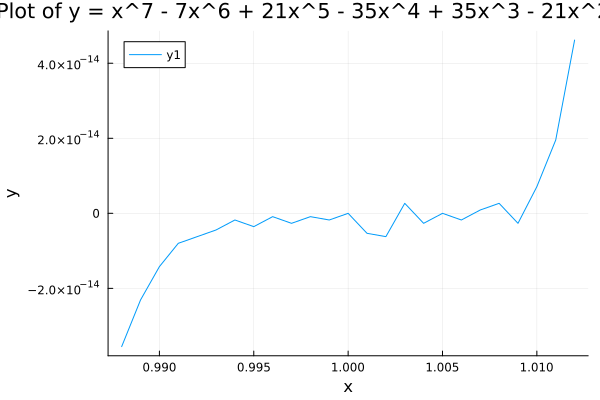

In [75]:
y = x.^7 - 7x.^6 + 21x.^5 - 35x.^4 + 35x.^3 - 21x.^2 + 7x .- 1
# y = x.^7 - 7 * x.^6 + 21 * x.^5 - 35 * x.^4 + 35 * x.^3 - 21 * x.^2 + 7 * x .- 1
using Plots
plot(x, y, xlabel = "x", ylabel = "y", title = "Plot of y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1")

Q4.2. Plot the polynomial `y = (x - 1)^7` at points `x`. 

**Solution**

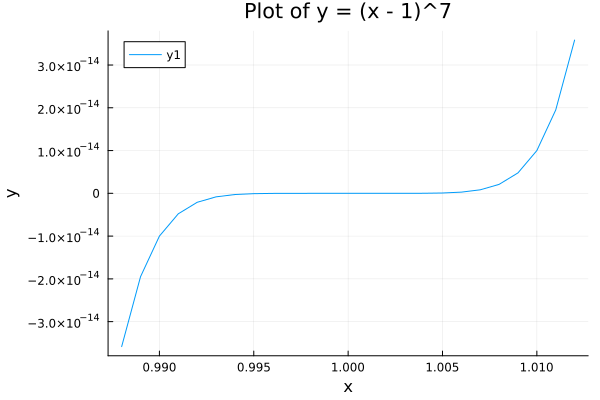

In [76]:
y = (x .- 1).^7
plot(x, y, xlabel = "x", ylabel = "y", title = "Plot of y = (x - 1)^7")

Q4.3. Explain what you found.

**Solution**

Obviously, `y = (x - 1)^7` provided more accurate (smooth) plots. On the contrary, the roughness of the other plots can be attributed to cumulative rounding errors from many arithmetic operations.

## Q5. Woodbury formula

Demonstrate the following results in Julia (one numerical example for each fact). Mathematically curious ones are encouraged to prove them. 

Q5.1. **Sherman-Morrison formula**:
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

**Solution.**

Proving this is straightforward. Use the fact that $(\mathbf{A} + \mathbf{u} \mathbf{u}^T)(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = (\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1}(\mathbf{A} + \mathbf{u} \mathbf{u}^T) =\mathbf I_n$.

$$
\begin{align*}
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1}
	&= (\mathbf{A} + \mathbf{u} \mathbf{u}^T)\left[\mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}\right] \\
	&= \mathbf I_n
	+ \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}
	- \frac{\mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} 
	- \frac{(\mathbf{u} \mathbf{u}^T \mathbf{A}^{-1})(\mathbf{u} \mathbf{u}^T \mathbf{A}^{-1})}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}}\\
	&= \mathbf I_n
	+ \frac{\mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}(\mathbf{u}^T \mathbf{A}^{-1} \mathbf{u})}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} 
	- \frac{\mathbf{u} (\mathbf{u}^T \mathbf{A}^{-1}\mathbf{u}) \mathbf{u}^T \mathbf{A}^{-1}}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}}\\
	& = \mathbf I_n
\end{align*}
$$
since $\mathbf{u}^T \mathbf{A}^{-1}\mathbf{u}$ is scalar. The same holds true for left-right reverse multiplication.

In [77]:
## set dimension
n = 5
## set seed number
using Random
Random.seed!(257)

## create a random matrix A and a random vector u
A = rand(n, n)
u = rand(n)

## compute the inverse of A + uu'
inv(A + u * u')

5×5 Matrix{Float64}:
 -3.82769    4.21818   1.49492    1.31681   -3.15513
  2.6669    -1.69853  -0.619175  -0.828194   0.877865
  4.95506   -5.11298  -3.31178    0.051452   4.10314
  0.371063  -1.04998   0.760928  -0.235422   0.636954
 -2.70264    2.38692   1.19319   -0.494644  -0.445729

In [78]:
## check two transpose functions
transpose(u) == u'

true

In [79]:
## compute Sherman-Morrison formula
inv(A) - inv(A) * u * u' * inv(A) / (1 + u' * inv(A) * u)

5×5 Matrix{Float64}:
 -3.82769    4.21818   1.49492    1.31681   -3.15513
  2.6669    -1.69853  -0.619175  -0.828194   0.877865
  4.95506   -5.11298  -3.31178    0.051452   4.10314
  0.371063  -1.04998   0.760928  -0.235422   0.636954
 -2.70264    2.38692   1.19319   -0.494644  -0.445729

In [80]:
## check the computational difference
inv(A + u * u') == inv(A) - inv(A) * u * u' * inv(A) / (1 + u' * inv(A) * u)

false

The results of the two calculations did not match numerically, but they were almost identical.

Q5.2. **Woodbury formula**:
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Solution.**

Mathmetical proof is similar to part 1.

$$
\begin{align*}
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1}
	&= (\mathbf{A} + \mathbf{U} \mathbf{V}^T)\left[\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\right] \\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1}
	- \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} 
	- \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1}
	- \mathbf{U}(\mathbf I_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}) (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1} - \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1} \\
	&= \mathbf I_n.
\end{align*}
$$

In [89]:
## set dimension
n = 8
m = 2

## create a random (nonsingular) matrix A and a random vector u
A = rand(n, n)
U = rand(n, m)
V = rand(n, m)

## compute the inverse of A + UV'
inv(A + U * V')

8×8 Matrix{Float64}:
   3.16214     9.97438   -3.25113  …    4.3096   -2.78006   -5.33508
  -9.29571   -30.5302     7.96162     -10.9525    7.42219   14.1601
  27.7878     95.734    -23.7863       32.2049  -22.8548   -43.2109
 -52.4624   -179.575     43.6529      -60.1683   46.4177    80.6667
 -62.2543   -216.457     53.7673      -73.4904   55.7206    97.0493
   9.83792    31.1315    -7.17774  …   10.7199   -8.32705  -13.5353
  38.8956    133.776    -33.8624       44.8936  -34.8798   -59.991
  41.0947    144.496    -34.4168       48.7799  -38.0176   -64.7637

In [118]:
## compute Woodbury formula
inv(A) - inv(A) * U * inv(I + V' * inv(A) * U) * V' * inv(A)

8×8 Matrix{Float64}:
   3.16214     9.97438   -3.25113  …    4.3096   -2.78006   -5.33508
  -9.29571   -30.5302     7.96162     -10.9525    7.42219   14.1601
  27.7878     95.734    -23.7863       32.2049  -22.8548   -43.2109
 -52.4624   -179.575     43.6529      -60.1683   46.4177    80.6667
 -62.2543   -216.457     53.7673      -73.4904   55.7206    97.0493
   9.83792    31.1315    -7.17774  …   10.7199   -8.32705  -13.5353
  38.8956    133.776    -33.8624       44.8936  -34.8798   -59.991
  41.0947    144.496    -34.4168       48.7799  -38.0176   -64.7637

In [113]:
inv(A + U * V') == inv(A) - inv(A) * U * inv(I + V' * inv(A) * U) * V' * inv(A)

false

Similarly to part 1, the two calculation results did not align numerically, but they were nearly identical.

Q5.3. **Binomial inversion formula**:
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

**Solution**

Note $\mathbf{B} \in \mathbb{R}^{m \times m}$. The proof is almost the same as part 2:
$$
\begin{align*}
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1}
	&= (\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)\left[\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\right] \\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A}^{-1}
	- \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} 
	- \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A}^{-1}
	- \mathbf{U}\mathbf{B}(\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}) (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\\
	&= \mathbf I_n.
\end{align*}
$$

In [91]:
## create a random (nonsingular) matrix B
B = rand(m, m)

## compute the inverse of A + UBV'
inv(A + U * B * V')

8×8 Matrix{Float64}:
  0.324743   0.100478  -0.749451  …   0.954688  -0.358742   -0.888312
 -0.806853  -0.985366   0.469317     -0.913634   0.174118    0.847591
  1.09993    2.85133   -0.236364      0.644985  -0.0702409  -1.36344
 -3.13468   -7.89358    0.115877     -1.83354    4.29993     3.30897
 -2.48557   -8.4393     1.02069      -2.80932    4.69088     3.3239
  1.24747    1.23278    0.404676  …   0.560768  -0.991998   -0.0629196
  2.37301    6.66284   -1.62944       1.70263   -3.69661    -2.71722
  1.35401    6.1828     0.656426      1.78319   -4.08671    -2.44313

In [94]:
## compute the Binomial inversion formula
inv(A) - inv(A) * U * inv(inv(B) + V' * inv(A) * U) * V' * inv(A)

8×8 Matrix{Float64}:
  0.324743   0.100478  -0.749451  …   0.954688  -0.358742   -0.888312
 -0.806853  -0.985366   0.469317     -0.913634   0.174118    0.847591
  1.09993    2.85133   -0.236364      0.644985  -0.0702409  -1.36344
 -3.13468   -7.89358    0.115877     -1.83354    4.29993     3.30897
 -2.48557   -8.4393     1.02069      -2.80932    4.69088     3.3239
  1.24747    1.23278    0.404676  …   0.560768  -0.991998   -0.0629196
  2.37301    6.66284   -1.62944       1.70263   -3.69661    -2.71722
  1.35401    6.1828     0.656426      1.78319   -4.08671    -2.44313

In [95]:
inv(A + U * B * V') == inv(A) - inv(A) * U * inv(inv(B) + V' * inv(A) * U) * V' * inv(A)

false

Q5.4. **Determinant identity**:
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Solution**

Use $\mathbf A = \mathbf A^{1/2}\mathbf A^{1/2}$ and an important determinant proporty: $\det(\mathbf I_n + \mathbf U \mathbf V^T) = \det(\mathbf I_m + \mathbf V^T \mathbf U)$.
$$
\begin{align*}
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T)
	&= \det(\mathbf{A}^{1/2}) \text{det}(\mathbf{I}_n + \mathbf A^{-1/2}\mathbf{U} \mathbf{V}^T\mathbf A^{-1/2})\det(\mathbf{A}^{1/2})\\
	&= \det(\mathbf{A}) \det(\mathbf{I}_m + \mathbf{V}^T\mathbf A^{-1/2}\mathbf A^{-1/2}\mathbf{U})\\
	&= \det(\mathbf{A}) \det(\mathbf{I}_m + \mathbf{V}^T\mathbf A^{-1}\mathbf{U}).
\end{align*}
$$

In [96]:
## compute LHS
det(A + U * V')

-0.0012527434095476859

In [119]:
## compute RHS
det(A) * det(I + V' * inv(A) * U)

-0.0012527434095476095

The two were almost the same.

## Q6. Triangular matrix and orthogonal matrix

Demonstrate the following facts about triangular and orthogonal matrices in Julia (one numerical example for each fact). Mathematically curious ones are encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

5. An orthogonal upper (lower) triangular matrix is diagonal. (You just need to prove this.)

6. The product of two orthogonal matrices is orthogonal.

## Q7. Looping

Let the $n \times n$ matrix `H` have elements `H[i, j] = 1 / (i + j - 1)`.  

1. Write a function `h(n)` that outputs $n \times n$ matrix `H`. Try at least 4 ways, e.g., $ij$-looping, $ji$-looping, [comprehension](https://docs.julialang.org/en/v1/manual/arrays/#man-comprehensions), and vectorization (R style). Compute and print `H` for `n = 5`.   

2. Compare their speed and memory efficiencies using `BenchmarkTools.jl` at `n = 5000`.